In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
# code for importing required libraries

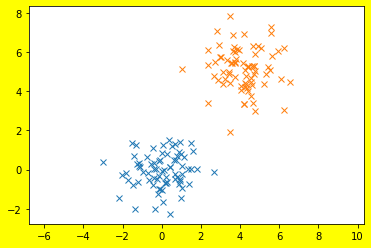

In [2]:
mean1 = (0,0)
mean2 = (4,5)
cov1 = [[1, 0], [0, 1]]
cov2 = [[1, 0], [0, 1]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 75).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 75).T

plt.figure(facecolor='yellow')
ax = plt.axes()
ax.set_facecolor('white')
plt.plot(x1, y1, 'x')
plt.plot(x2, y2, 'x')
plt.axis('equal')

plt.show()
# PLOT for train + test set

In [3]:
data = []

for i in range(len(x1)):
        data.append([x1[i], y1[i], -1])
for i in range(len(x2)):
        data.append([x2[i], y2[i], 1])

In [4]:
data = np.array(data)
np.random.shuffle(data)

In [5]:
tr_data = []
test_data = []

for i in range(100):
    tr_data.append(data[i])
for j in range(100, len(data)):
    test_data.append(data[j])

train_data = np.array(tr_data)
test_data = np.array(test_data)

In [6]:
def grad_des(x, y, alpha, epochs):
    
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    x = np.concatenate((np.ones((m,1)),x), axis=1)
    w = 2*np.random.rand(n+1,)-1
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
#         error = []
#         for i in range(len(y_estimated)):
#             error.append(1 if ((y[i]==-1 and y_estimated[i]>0) or (y[i]==1 and y_estimated[i]<0)) else 0)
            
#         error = np.array(error)
#         cost = np.sum(error)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * gradient
        loss_history.append(cost)
    return loss_history, w

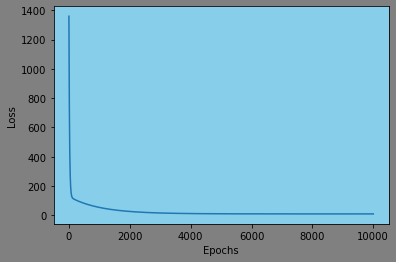

In [7]:
loss, w = grad_des(train_data[:,:-1],train_data[:,-1], 0.001, 10000)

plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("skyblue")
plt.plot(np.arange(len(loss)), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show
# Loss function for 10000 epochs

In [8]:
print(loss)
# loss history

[1359.3353670304905, 1299.5515928738853, 1242.657446623223, 1188.512994857279, 1136.9850808531714, 1087.946996404003, 1041.278169529742, 996.8638673116566, 954.5949131179061, 914.3674175233425, 876.08252226035, 839.6461565696446, 804.9688053505345, 771.9652885392139, 740.554551171337, 710.6594636114555, 682.2066314569564, 655.1262146479854, 629.351755337522, 604.8200140973787, 581.4708140564217, 559.2468925868756, 538.0937601731769, 517.9595661155303, 498.7949707371835, 480.5530237804575, 463.1890486918185, 446.6605325108011, 430.92702109139753, 415.9500193976708, 401.69289662785945, 388.1207959331362, 375.2005485085139, 362.90059184416106, 351.19089193564815, 340.0428692614008, 329.4293283449215, 319.32439072817647, 309.70343119095025, 300.5430170589759, 291.8208504512515, 283.5157133242099, 275.6074151772913, 268.0767432910337, 260.9054153750371, 254.07603450909312, 247.57204626643056, 241.37769791339738, 235.47799958502367, 229.85868734077684, 224.5061880094546, 219.40758573657217, 

In [10]:
print(w)
# weight matrix

[-0.86714103  0.18100869  0.20624101]


In [11]:
x = test_data[:,:-1]
y = test_data[:,-1]

x = np.concatenate((np.ones((50,1)),x), axis=1)
y_pred = np.dot(x,w.T)
# seperating the test set

In [13]:
error = y_pred - y
cost = np.sum(error ** 2)
print(error)
# Mean square error

[ 0.12104355  0.05443868 -0.09895305  0.35618927  0.03255324  0.61875627
  0.18835407 -0.2208219  -0.07586051 -0.17998864  0.38244469  0.40376281
  0.14948977 -0.29999797 -0.01010974 -0.21490928 -0.27557415  0.21029507
  0.58183936  0.34203016  0.47290178  0.5992082   0.19224271  0.23992896
  0.23513512 -0.31944944  0.0693549  -0.19952463 -0.29204074 -0.15460664
 -0.05566705 -0.02599672 -0.09318731  0.16046737  0.13714346 -0.25661376
 -0.3371589   0.2144881  -0.04107876  0.04456037  0.19439258  0.21017573
 -0.40317382 -0.11443146  0.58523814  0.53694018  0.45926422  0.26627022
 -0.06635226 -0.19133867]


In [16]:
error = []
for i in range(len(y_pred)):
    error.append(1 if ((y[i]==-1 and y_pred[i]>0) or (y[i]==1 and y_pred[i]<0)) else 0)

error = np.array(error)
cost = np.sum(error)
print(cost)
# 0-1 loss

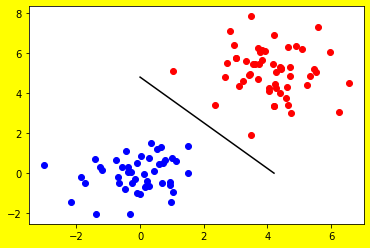

In [42]:
# PLOT for training data
plt.figure(facecolor='yellow')
ax = plt.axes()
ax.set_facecolor('white')
for i in range(len(train_data)):
    if train_data[i,2] == 1:
        plt.plot(train_data[i,0], train_data[i,1], 'ro')
    else:
        plt.plot(train_data[i,0], train_data[i,1], 'bo')
plt.plot([-w[0]/w[2], 0], [0, -w[0]/w[1]], 'k-')
plt.show()

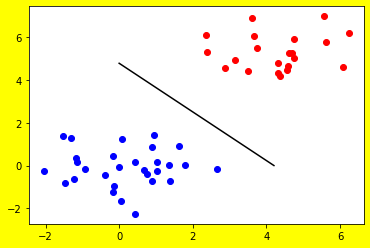

In [41]:
# PLOT for testing data
plt.figure(facecolor='yellow')
ax = plt.axes()
ax.set_facecolor('white')
for i in range(len(test_data)):
    if test_data[i,2] == 1:
        plt.plot(test_data[i,0], test_data[i,1], 'ro')
    else:
        plt.plot(test_data[i,0], test_data[i,1], 'bo')
plt.plot([-w[0]/w[2], 0], [0, -w[0]/w[1]], 'k-')
plt.show()